# TKT4108 Structural dynamics 2

## Solution exercise 3

**Main topics:** Correlation and statistical properties of random processes

**References:** Newland Chapter 1-3

### Problem 1: Technical terms



**a)**

A stochastic process is stationary if its statistical properties do not change over time. Specifically, this means that the joint probability distribution of process independent of time. In more practical terms, the mean and variance, and all higher-order statistical moments do not change over time.

**b)**

Weakly stationarity requires only the mean and variance (the two first statistical moments) to be independent of time. Additionally, the autocorrelation function must depend only on the time lag $\tau$ between two time instants, rather than on the specific times themselves. This is a less strict form of stationarity.

**c)**
A stochastic process is ergodic if its time averages are equal to ensemble averages (averages over all possible realizations of the process). This means that you can obtain the statistical properties of the entire process by observing a single realization of the process that is sufficiently long.



### Problem 2: Statistical properties


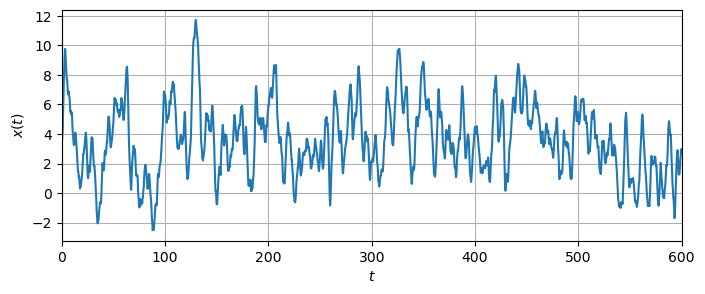

In [2]:
# Import and plot time series

import numpy as np
from matplotlib import pyplot as plt

# Load data from text file
data=np.loadtxt('x_timeseries.csv',delimiter=',',skiprows=1).T

t=data[0,:]
x=data[1,:]

plt.figure(figsize=(8,3))
plt.plot(t,x)
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.xlim(0,600)
plt.grid()

**a)**

In [3]:
# Calculate statistics

mean=np.mean(x)
print('The mean is ' + "{:.3f}".format(mean))

sd=np.std(x)
print('The variance is ' + "{:.3f}".format(sd**2))


The mean is 3.564
The variance is 5.689


**b)**

We repeat the statistical calculation for each data length

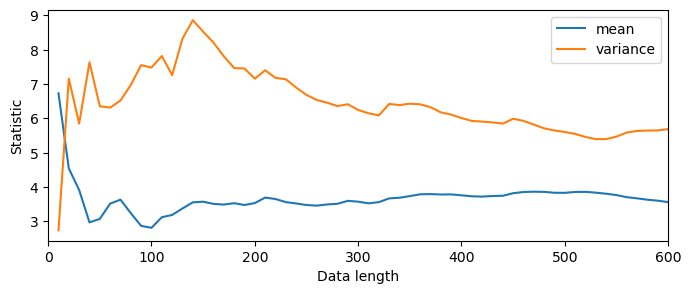

In [7]:
# Vector from 10 to 600 with intervals 10
T_test=np.arange(10,600+10,10)

mean_test=np.zeros(len(T_test))
sd_test=np.zeros(len(T_test))

# Loop over all the test lengths
for idx,T in enumerate(T_test):

    # Find the index where to cut the time axis
    idx_T=int(np.argmin(abs(t-T)))

    # Calculate statistics
    mean_test[idx]=np.mean(x[0:idx_T])
    sd_test[idx]=np.std(x[0:idx_T])

plt.figure(figsize=(8,3))
plt.plot(T_test,mean_test,label='mean')
plt.plot(T_test,sd_test**2,label='variance')
plt.grid()

plt.xlabel("Data length")
plt.ylabel("Statistic")
plt.xlim(0,600)
plt.grid()
plt.legend()


The statistical metrics start to converge around 300-400 s. In theory, an infinite long sample is required $(T \rightarrow \infty)$. In practice, we have to accept a reasonable degree of convergence from time series of finite length.

In general, processes with higher frequencies require shorter data lengths to achieve convergence in the statistics, as they complete more cycles compared to low-frequency processes.

**c)**

The process must be stationary and ergodic in order to calculate the mean and variance from the single time series.

**d)**

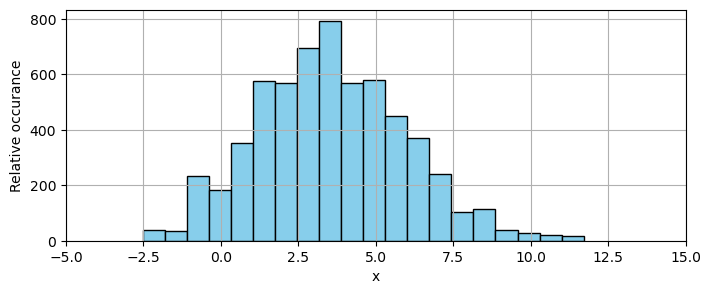

In [5]:
# Plot histogram

plt.figure(figsize=(8,3))
plt.hist(x, bins=20, color='skyblue', edgecolor='black')

plt.xlabel("x")
plt.ylabel("Relative occurance")
plt.xlim(-5,15)
plt.grid()

From the bell shape of the curve we observe that $x(t)$ is a Gaussian process and has a normal distribution $x \sim \mathcal{N}(\mu \approx 3.5,\sigma^2 \approx 5.7)$.

### Problem 3: Auto correlation of response

**a)** 

We utilize the definition:

$$R_{y_1}(\tau)=\text{E}[y_1(t)y_1(t+\tau)]$$

First, let us express $y_1(t)$:

$$ \mathbf{y}(t) 
=
\left[ \begin{array}{c} 
y_{1}(t)  \\
y_{2}(t)
\end{array}\right]
=
\left[ \begin{array}{cc} 
\phi_{11} & \phi_{12}  \\
\phi_{21} & \phi_{22} 
\end{array}\right]
\left[ \begin{array}{c} 
z_{1}(t)  \\
z_{2}(t)
\end{array}\right]
$$

or 

$$ y_{1}(t) =\phi_{11}z_{1}(t) + \phi_{12}z_{2}(t) $$

We insert this into the auto-correlation and multiply out:

$$
\begin{align}
R_{y_1}(\tau) &= \text{E}[y_1(t)y_1(t+\tau)] \\
&= \text{E} \left[ \big(\phi_{11}z_{1}(t) + \phi_{12}z_{2}(t) \big) \big(\phi_{11}z_{1}(t+\tau) + \phi_{12}z_{2}(t+\tau) \big) \right] \\
&= \text{E} \left[ \phi_{11}z_{1}(t) \phi_{11}z_{1}(t+\tau) \right]
+ \text{E}  \left[ \phi_{11}z_{1}(t) \phi_{12}z_{2}(t+\tau) \right]
+ \text{E}  \left[ \phi_{12}z_{2}(t) \phi_{11}z_{1}(t+\tau) \right]
+ \text{E}  \left[ \phi_{12}z_{2}(t) \phi_{12}z_{2}(t+\tau) \right] \\
&= \phi_{11}^2 R_{z_1}(\tau) + \phi_{11}\phi_{12} R_{z_1 z_2}(\tau) + \phi_{11}\phi_{12} R_{z_2 z_1}(\tau) + \phi_{12}^2 R_{z_2}(\tau)
\end{align}
$$



We conclude that a process which is a sum of two other processes, will depend on the interaction (cross-correlation) between those two processes.

**b)**

If mode 1 and 2 are not correlated, then $R_{z_1 z_2}(\tau)=0$ and $R_{z_2 z_1}(\tau)=0$. The expression simplifies to:

$$
R_{y_1}(\tau) = \phi_{11}^2 R_{z_1}(\tau) + \phi_{12}^2 R_{z_2}(\tau)
$$


### Problem 4: Auto-correlation function

* $x_1(t)$ is a smooth process in which, generally speaking, each point on the graph has values similar to those of nearby points (e.g., within 
$\pm 2$ s). However, points that are significantly far apart ($\geq 20$ s) show no correlation. Consequently, $R_C(\tau)$ therefore fits well.

* $x_2(t)$: This is a coarse process in which neighbouring points exhibit little correlation. For example, at a given instant $t_1$, the value might be high, while the next second it could drop significantly. This is similar to the process of drawing a new random number at each time step. As a result, the process appears highly chaotic.  $R_B(\tau)$ matches this characteristic since it has almost no correlation, except at $\tau=0$ where there will always be a perfect correlation.

* $x_3(t)$: This a process with only one dominant frequency, but the amplitude changes over time (aka. a narrow-banded process). Since the process has some periodicity, it will have both negative and positive correlations. For instance, a peak at time  $t_1$ will be correlated to peaks at $t_1+T_n$, $t_1+2T_n$, and so on. It will also be negatively correlated to valleys at $t_1+\frac{1}{2}T_n$ and $t_1+\frac{3}{2}T_n$. The correlation fades for longer time lags, however. $R_A(\tau)$ is the matching item, and it looks very typical of the autocorrelation function for a stochastic response in a system where only one mode is activated.
